# DBSCAN

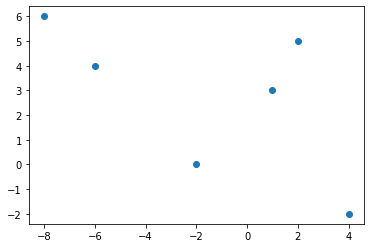

In [7]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1,3] , [-8,6], [-6,4] , [4,-2], [2,5], [-2,0]])

plt.scatter(X[:,0],X[:,1])
plt.show()


In [8]:
np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)

array([[ 0.        ,  9.48683298,  7.07106781,  5.83095189,  2.23606798,
         4.24264069],
       [ 9.48683298,  0.        ,  2.82842712, 14.4222051 , 10.04987562,
         8.48528137],
       [ 7.07106781,  2.82842712,  0.        , 11.66190379,  8.06225775,
         5.65685425],
       [ 5.83095189, 14.4222051 , 11.66190379,  0.        ,  7.28010989,
         6.32455532],
       [ 2.23606798, 10.04987562,  8.06225775,  7.28010989,  0.        ,
         6.40312424],
       [ 4.24264069,  8.48528137,  5.65685425,  6.32455532,  6.40312424,
         0.        ]])

## DBSCAN from Scratch!


Text(0.5, 1.0, 'Scattered data')

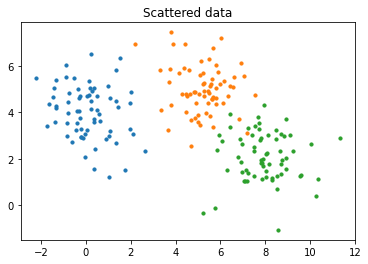

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")

Let’s define our two main functions;

In [6]:
def DBSCAN(x, eps, min_pts): 
    
    # Build a label holder that is comprised of all 0s
    labels = [0]* x.shape[0]

    # Arbitrary starting "current cluster" ID
    C = 0
    
    # For each point p in x... 
    # ('p' is the index of the datapoint, rather than the datapoint 
    #itself.)
    for p in range(0, x.shape[0]):
        # Only unvisited points can be evaluated as neighborhood centers 
        if not (labels[p] == 0): 
            continue
            
        # Find all of p's neighbors. 
        neighbors = findNeighbors(x, p, eps)
         
        # If there are not enough neighbor points, then it is classified as noise (-1).
        # Otherwise we can use this point as a neighborhood cluster 
        if len(neighbors) < min_pts:
            labels[p] = -1
        else:
            C += 1
            expandCluster(x, labels, p, neighbors, C, eps, min_pts)
    return labels

def findNeighbors(x, p, eps): 
    neighbors = [] 
     
    # For each point in the dataset... 
    for potential_neighbor in range(0, x.shape[0]): 
         
        # If a nearby point falls below the neighborhood radius threshold, add to neighbors list 
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps: 
            neighbors.append(potential_neighbor) 
             
    return neighbors

def expandCluster(x, labels, p, neighbors, C, eps, min_pts):

    # Assign the cluster label to original point 
    labels[p] = C 
     
    # Look at each neighbor of p (by index, not the points themselves) and
    #evaluate
    i = 0
    while i < len(neighbors):
        # Get the next point from the queue.
        potential_neighbor_ix = neighbors[i]
        # If potential_neighbor_ix is noise from previous runs, we can assign it to current cluster 
        if labels[potential_neighbor_ix] == -1: 
            labels[potential_neighbor_ix] = C 
         
        # Otherwise, if potential_neighbor_ix is unvisited, we can add it to current cluster 
        elif labels[potential_neighbor_ix] == 0: 
            labels[potential_neighbor_ix] = C 
             
            # Further find neighbors of potential neighbor 
            potential_neighbors_cluster = findNeighbors(x, potential_neighbor_ix, eps) 
             
            if len(potential_neighbors_cluster) >= min_pts: 
                neighbors = neighbors + potential_neighbors_cluster       
         
        # Evaluate next neighbor 
        i += 1 

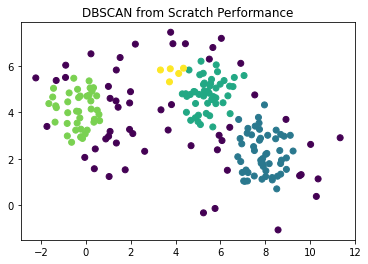

In [9]:
labels = DBSCAN(X, 0.6, 5)


plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()

## DBSCAN and hyperparameters

### Evaluating the impact of neighboorhood radius size

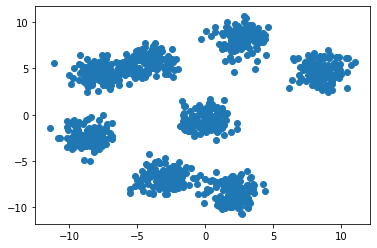

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

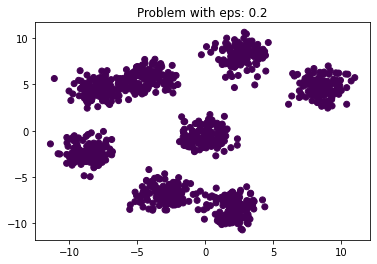

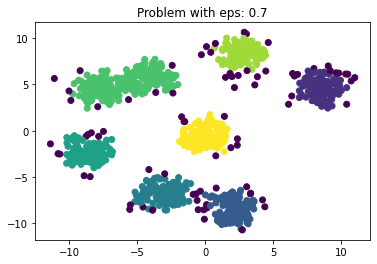

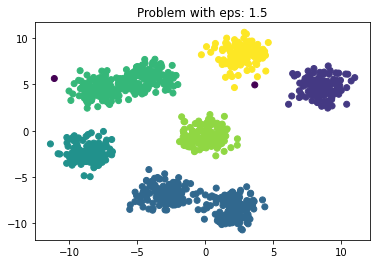

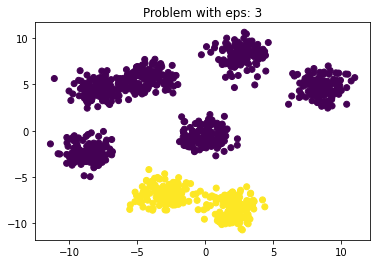

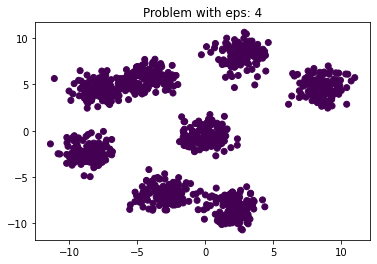

In [13]:
eps = [0.2,0.7,1.5,3,4]

for ep in eps:
    db = DBSCAN(eps=ep, min_samples=10, metric='euclidean')
    plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
    plt.title('Problem with eps: ' + str(ep))
    plt.show()

### Evaluating the impact of minimum points threshold

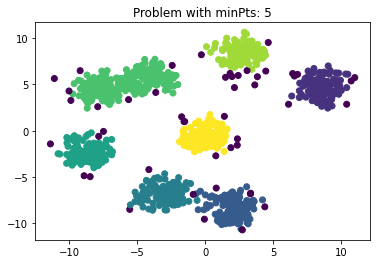

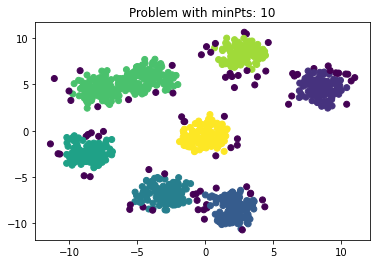

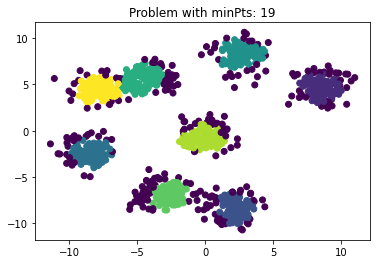

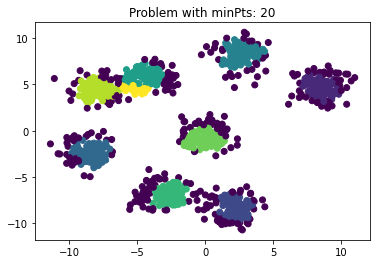

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

minPts = [5, 10, 19, 20]

for p in minPts:
    db = DBSCAN(eps=0.7, min_samples=p, metric='euclidean')
    plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
    plt.title('Problem with minPts: ' + str(p))
    plt.show()